In [1]:
from eblt.run import EBLT
from eblt.eblt_distgen import run_eblt_with_distgen, evaluate_eblt_with_distgen
import h5py
import os

# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

In [2]:
gfile = './example1/image.in.yaml'
eblt_config = {"input": "example1/eblt.in", "workdir": os.environ.get('SCRATCH'), "command": '/sdf/group/ad/sw/beta/bin/xeblt'}

In [3]:
SETTINGS0 = {
    'distgen:n_particle':2000,}


In [4]:
I = run_eblt_with_distgen(
    settings=SETTINGS0,
    distgen_input_file=gfile,
    eblt_config=eblt_config,
)


<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

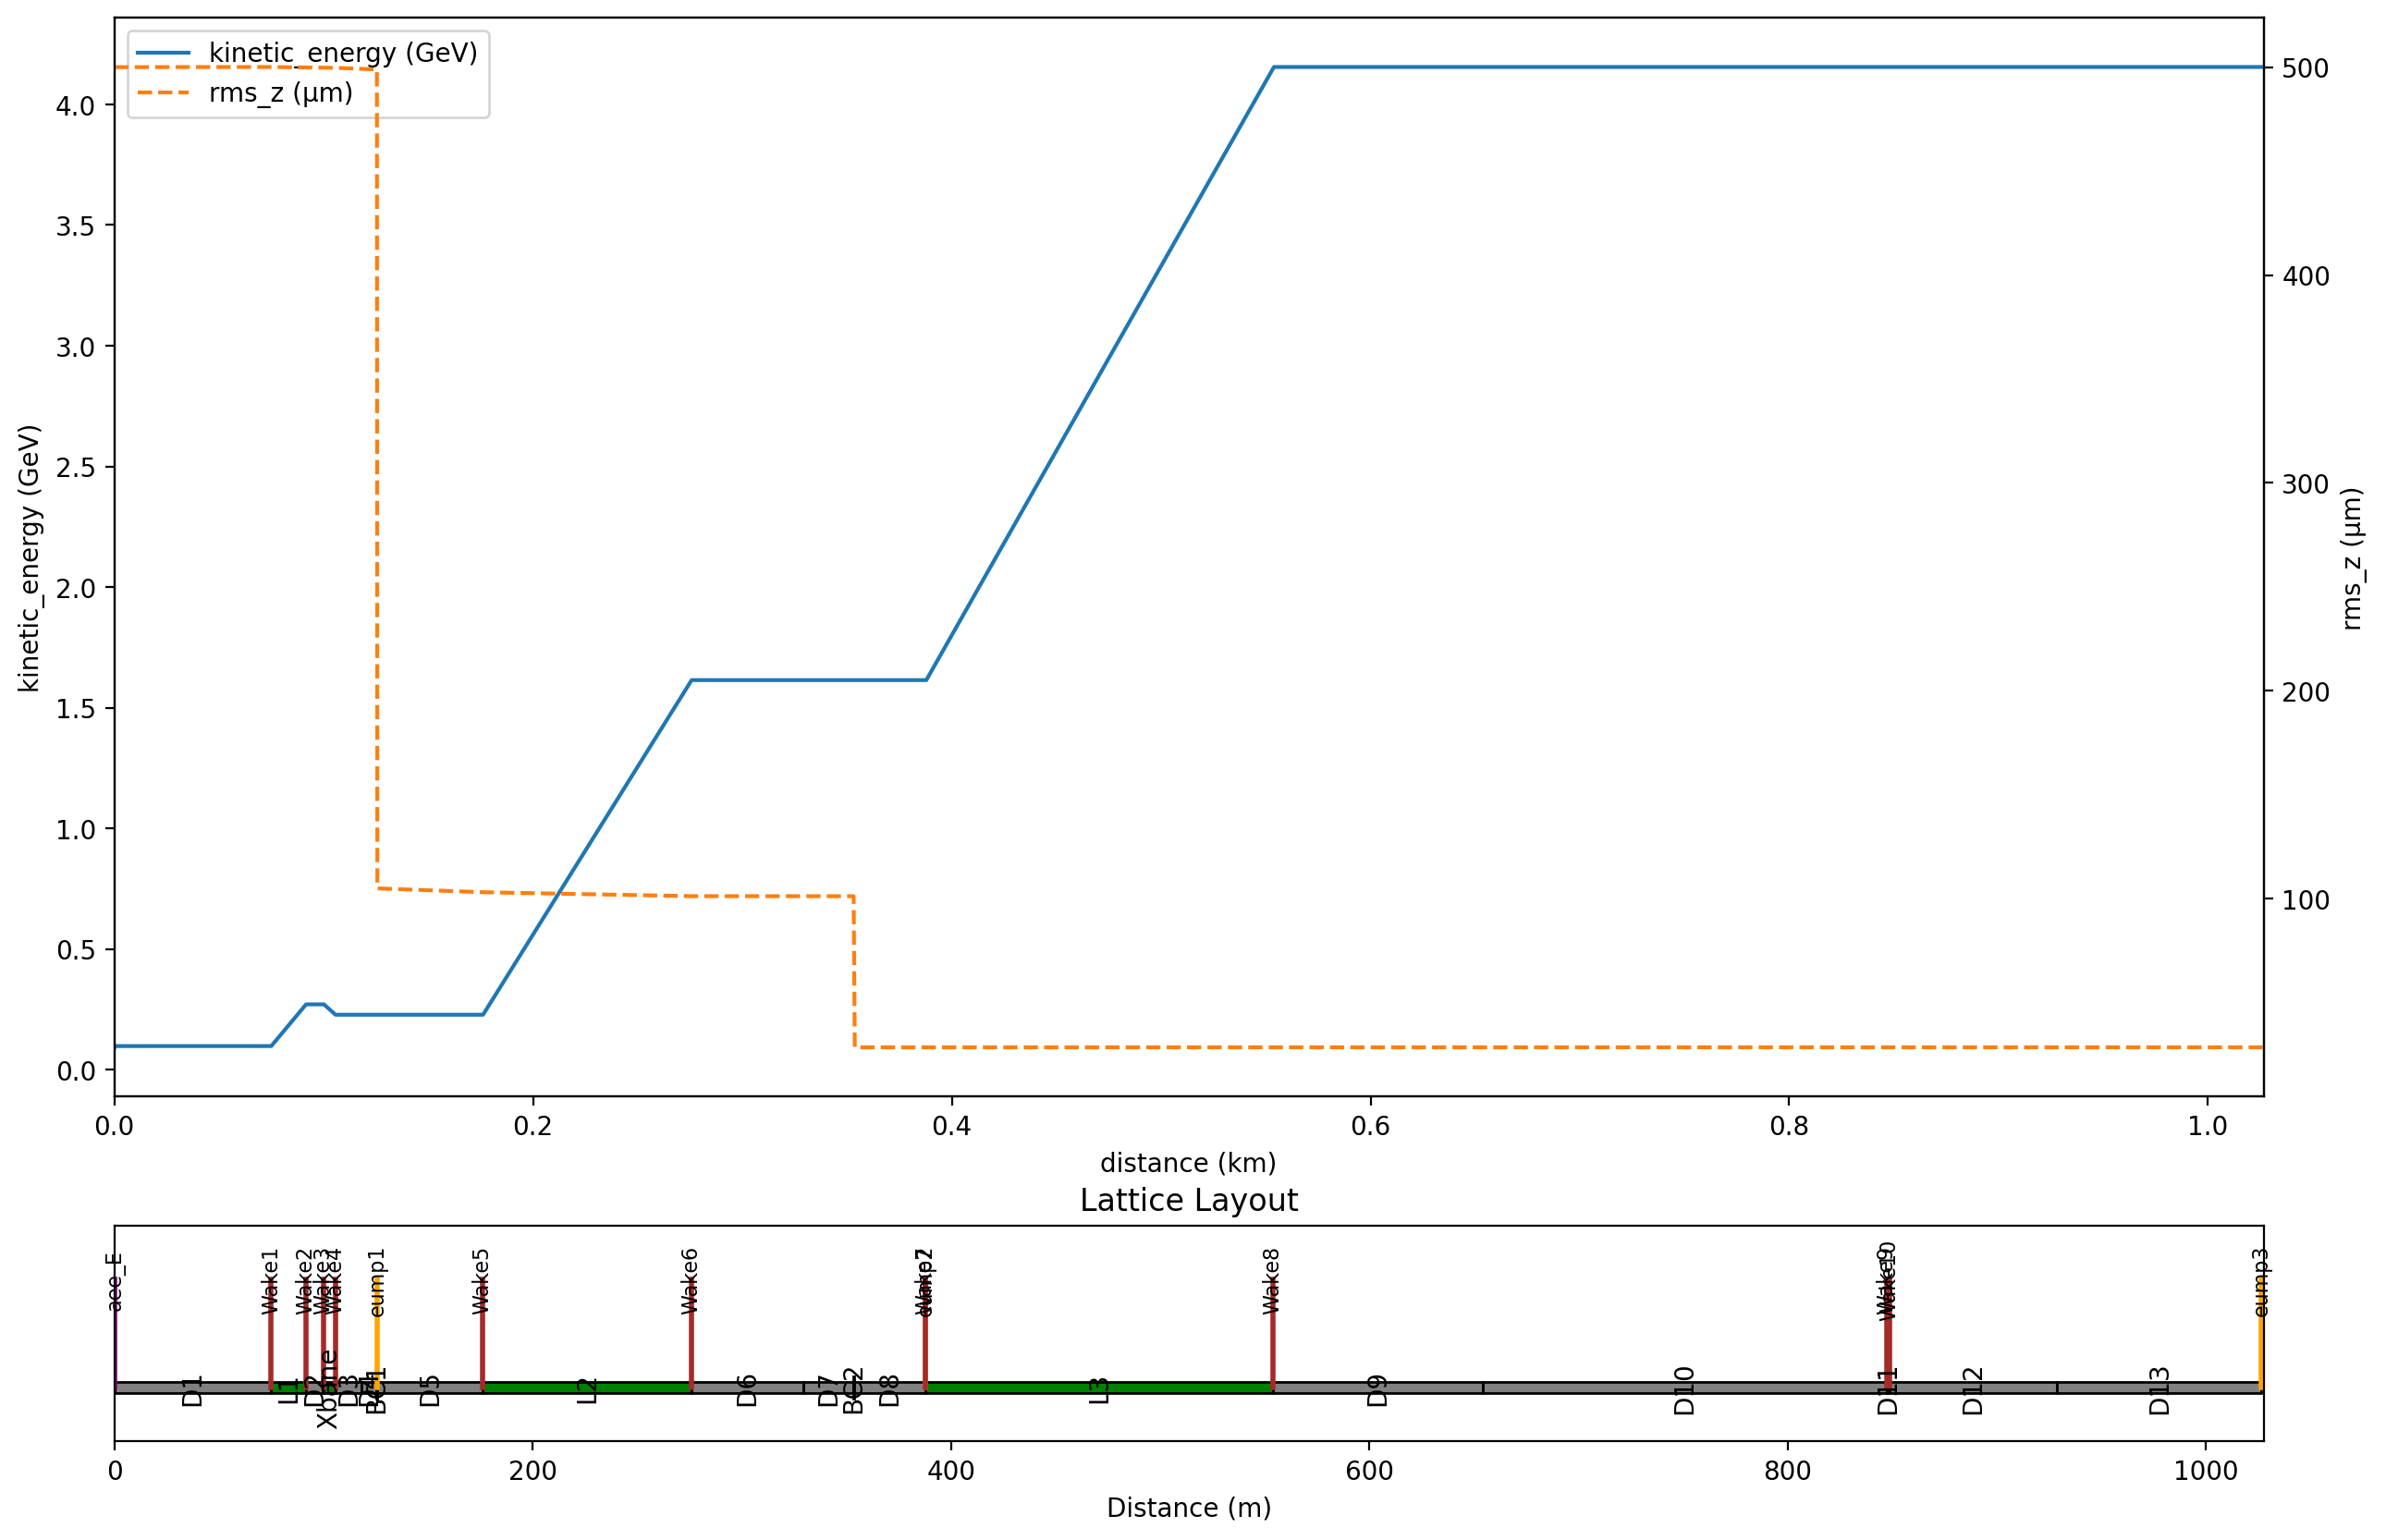

In [5]:
I.plot()

In [6]:
I.write_input()
!cat {I.path}/eblt.in

Shifting delta_e_over_e0 and delta_gamma given Ek
! np nz zmin zmax flagfwd flagdist
2000 128 -0.002981592 0.002211398 1 100 /
! a0 a1 a2 a3 a4 a5 a6 a7 a8 a9
0 0 0 /
! b0 b1 b2 b3 b4 b5 b6 b7 b8 b9
1 0 0 /
! Iavg Ek mass charge freq
0.13 92706472 511005 -1 1300000000 /
! length Bnseg Bmpstp ChangeEnergy energy_increment name
0 1 1 -39 5462800 / !name: aee_E
! length Bnseg Bmpstp Drift name
74.9744159418 1 1 0 0.0003 / !name: D1
! length Bnseg Bmpstp Wakefield multiplier wake_function_file_id switch name
0 1 1 -41 1 41 1 / !name: Wake1
! length Bnseg Bmpstp RFCavity beam_radius gradient frequency phase_deg name
16.603888 1 1 103 0.0003 10907447.83 1300000000 -17.43982832 / !name: L1
! length Bnseg Bmpstp Wakefield multiplier wake_function_file_id switch name
0 1 1 -41 1 41 -1 / !name: Wake2
! length Bnseg Bmpstp Drift name
8.5305163742 1 1 0 0.0003 / !name: D2
! length Bnseg Bmpstp Wakefield multiplier wake_function_file_id switch name
0 1 1 -41 1 42 1 / !name: Wake3
! length Bnseg Bmp

In [7]:
h5file = './test.h5'
I.archive(h5file)

In [8]:
with h5py.File(h5file, 'r') as h5:
    print(list(h5))

['input', 'output']


In [9]:
with h5py.File(h5file, 'r') as h5:
    print(h5.keys())
    I.from_archive(h5)
 

<KeysViewHDF5 ['input', 'output']>


In [10]:
# This returns an EBLT object that has run
O1 = evaluate_eblt_with_distgen(
    eblt_config=eblt_config,
    settings = SETTINGS0,
  
    distgen_input_file=gfile,
   
    archive_path = '.'
)

# This is the default output
O1

AttributeError: 'EBLTInput' object has no attribute 'keys'